<div style="text-align: center;">  
    <img src="./Images/Mushroom.jpg" alt="Image description" style="width: 500px; height: 250px; margin-up: 10px;">  <br>
    <div style="color: red; font-size: 40px;">Supervised Learning: Mushroom Classification</div>  
</div>

In [2]:
# Install required libraries
install.packages("dplyr")
install.packages("ggplot2")
install.packages("caret")
install.packages("class")
install.packages("e1071")
install.packages("ggmosaic")  

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto



In [3]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(caret)
library(class)
library(e1071)
library(ggmosaic)


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union


Caricamento del pacchetto richiesto: lattice



## Data Exploration

In [4]:
# Load Dataset:
mushroom_data<- read.csv("./Datasets/mushrooms.csv")

# View the structure of the dataset
str(mushroom_data)
summary(mushroom_data)


'data.frame':	8124 obs. of  23 variables:
 $ class                   : chr  "p" "e" "e" "p" ...
 $ cap.shape               : chr  "x" "x" "b" "x" ...
 $ cap.surface             : chr  "s" "s" "s" "y" ...
 $ cap.color               : chr  "n" "y" "w" "w" ...
 $ bruises                 : chr  "t" "t" "t" "t" ...
 $ odor                    : chr  "p" "a" "l" "p" ...
 $ gill.attachment         : chr  "f" "f" "f" "f" ...
 $ gill.spacing            : chr  "c" "c" "c" "c" ...
 $ gill.size               : chr  "n" "b" "b" "n" ...
 $ gill.color              : chr  "k" "k" "n" "n" ...
 $ stalk.shape             : chr  "e" "e" "e" "e" ...
 $ stalk.root              : chr  "e" "c" "c" "e" ...
 $ stalk.surface.above.ring: chr  "s" "s" "s" "s" ...
 $ stalk.surface.below.ring: chr  "s" "s" "s" "s" ...
 $ stalk.color.above.ring  : chr  "w" "w" "w" "w" ...
 $ stalk.color.below.ring  : chr  "w" "w" "w" "w" ...
 $ veil.type               : chr  "p" "p" "p" "p" ...
 $ veil.color              : chr  "w" "w

    class            cap.shape         cap.surface         cap.color        
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   bruises              odor           gill.attachment    gill.spacing      
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  gill.size          gill.color        stalk.shape         stalk.root       
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 stalk.surface.above.ring stalk.surface.below.ring stalk.color.above.ring
 L

## Preprocessing

In [5]:
# Check for missing values
missing_values <- colSums(is.na(mushroom_data))
print(missing_values)

# Omit rows with missing values
mushroom_data <- na.omit(mushroom_data)

# Convert all columns to factors
mushroom_data[] <- lapply(mushroom_data, as.factor)


                   class                cap.shape              cap.surface 
                       0                        0                        0 
               cap.color                  bruises                     odor 
                       0                        0                        0 
         gill.attachment             gill.spacing                gill.size 
                       0                        0                        0 
              gill.color              stalk.shape               stalk.root 
                       0                        0                        0 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       0                        0                        0 
  stalk.color.below.ring                veil.type               veil.color 
                       0                        0                        0 
             ring.number                ring.type        spore.print.color 
            

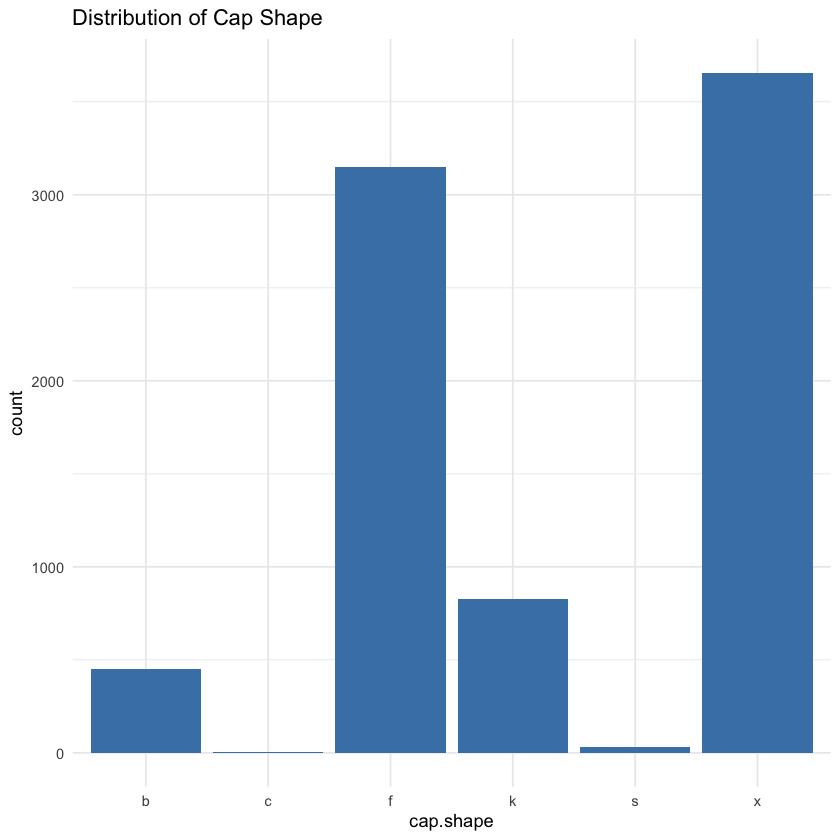

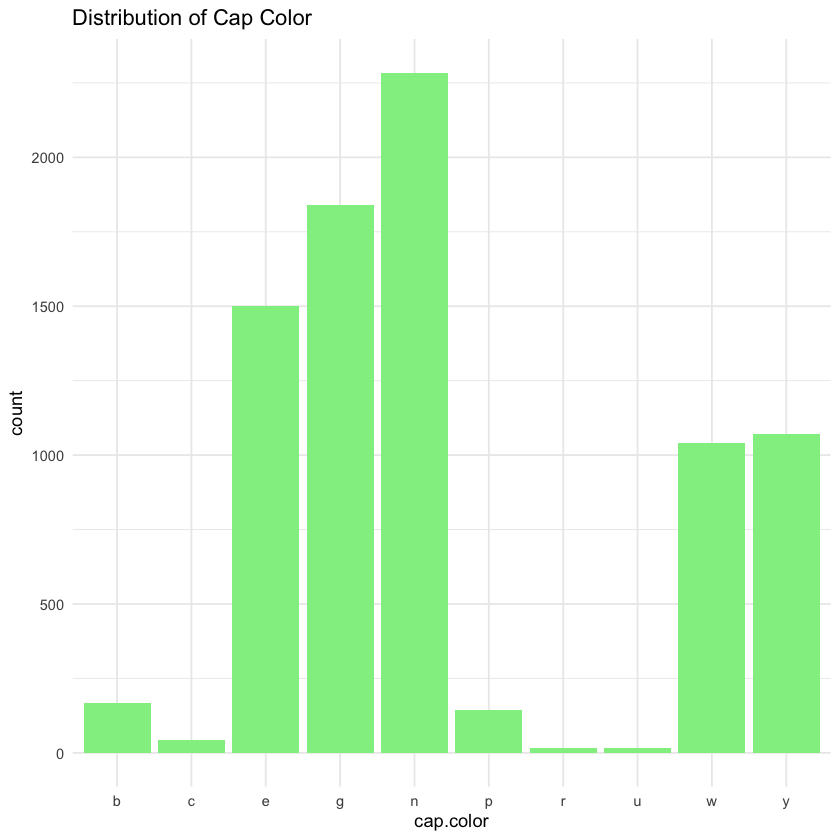

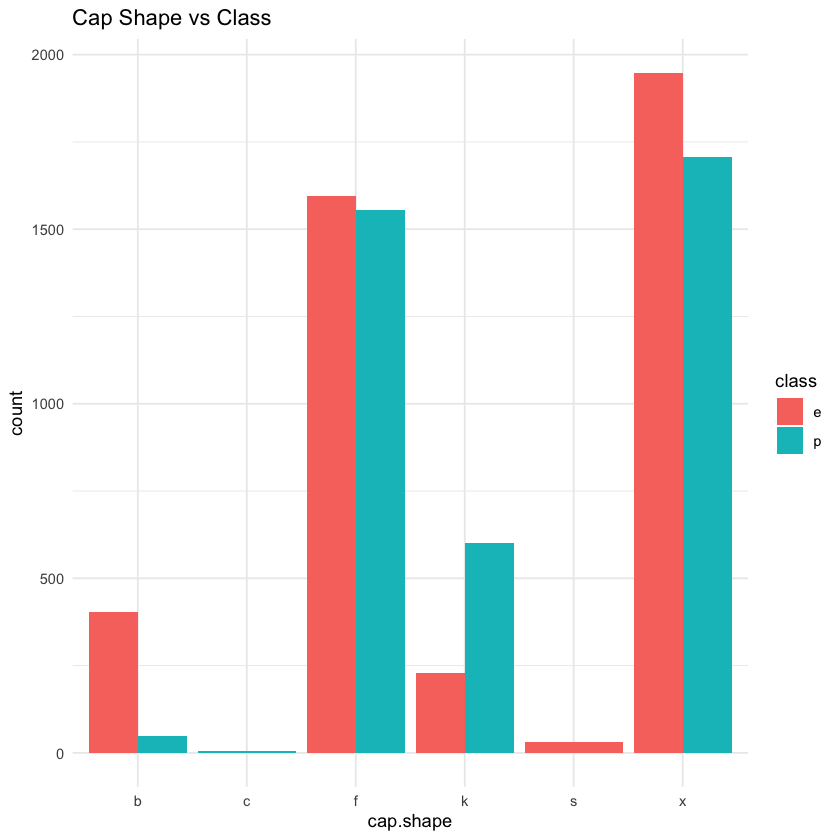

Warning message:
“The `scale_name` argument of `continuous_scale()` is deprecated as of ggplot2
3.5.0.”
Warning message:
“The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
ℹ Please use the `transform` argument instead.”
Warning message:
“`unite_()` was deprecated in tidyr 1.2.0.
ℹ Please use `unite()` instead.
ℹ The deprecated feature was likely used in the ggmosaic package.
  Please report the issue at <https://github.com/haleyjeppson/ggmosaic>.”


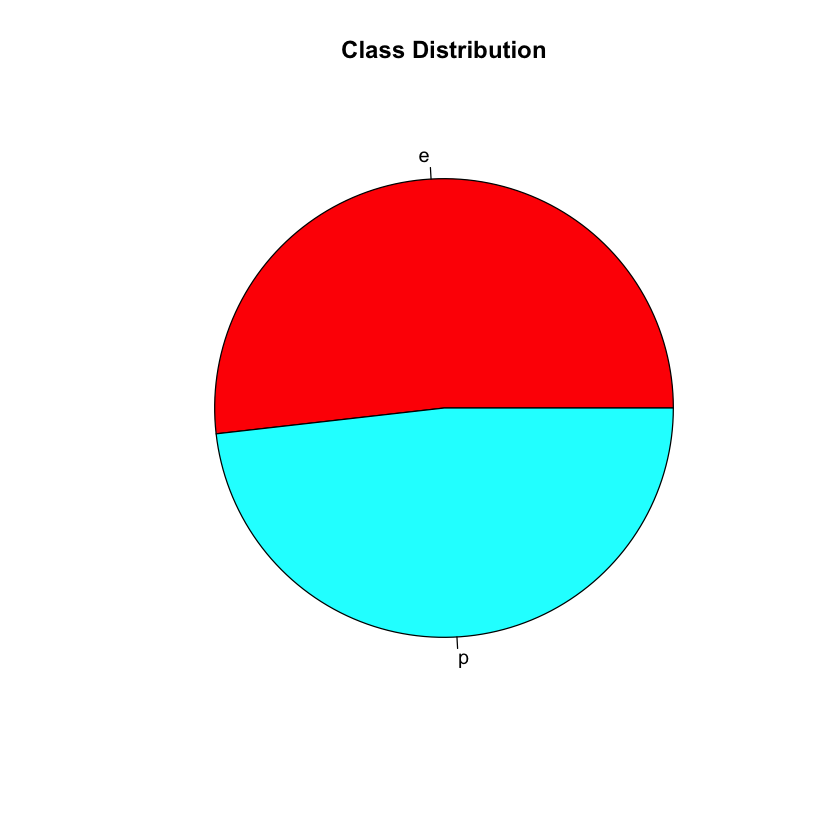

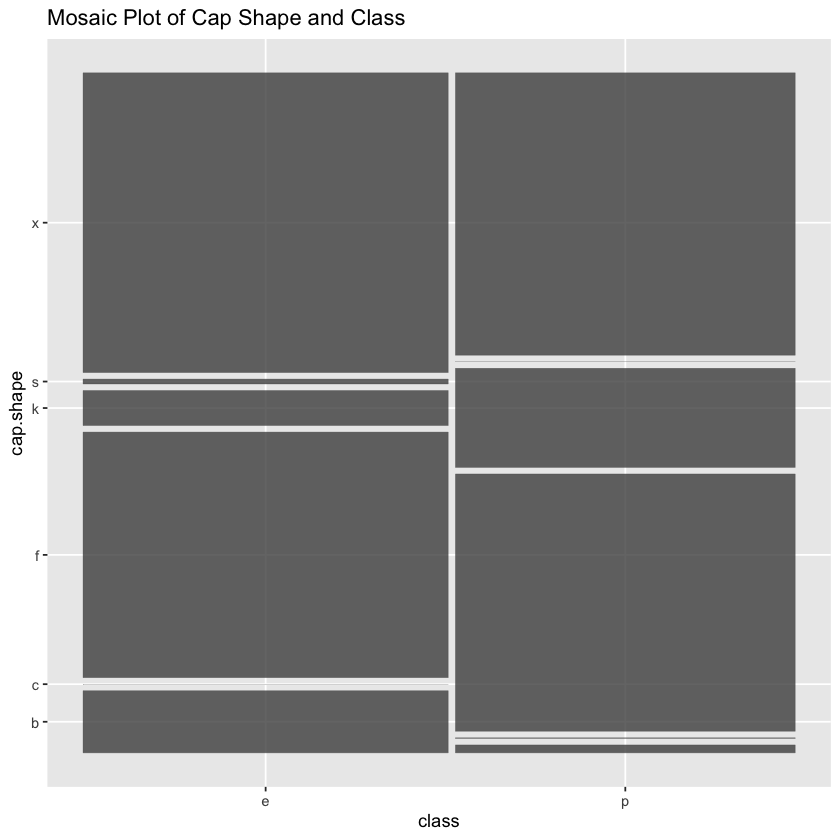

In [6]:
ggplot(mushroom_data, aes(x = cap.shape)) +  
  geom_bar(fill = "steelblue") +  
  theme_minimal() +  
  labs(title = "Distribution of Cap Shape")  

ggplot(mushroom_data, aes(x = cap.color)) +  
  geom_bar(fill = "lightgreen") +  
  theme_minimal() +  
  labs(title = "Distribution of Cap Color")  

ggplot(mushroom_data, aes(x = cap.shape, fill = class)) +  
  geom_bar(position = "dodge") +  
  theme_minimal() +  
  labs(title = "Cap Shape vs Class")  

class_distribution <- table(mushroom_data$class)  
pie(class_distribution, main = "Class Distribution", col = rainbow(length(class_distribution)))  

ggplot(mushroom_data) +  
  geom_mosaic(aes(x = product(cap.shape, class))) +  
  labs(title = "Mosaic Plot of Cap Shape and Class")  

In [7]:
# Split the dataset into training and testing sets
set.seed(123)
train_index <- sample(1:nrow(mushroom_data), 0.7 * nrow(mushroom_data))
train_data <- mushroom_data[train_index, ]
test_data <- mushroom_data[-train_index, ]

# Check for NA values in train and test sets
print(colSums(is.na(train_data)))
print(colSums(is.na(test_data)))

                   class                cap.shape              cap.surface 
                       0                        0                        0 
               cap.color                  bruises                     odor 
                       0                        0                        0 
         gill.attachment             gill.spacing                gill.size 
                       0                        0                        0 
              gill.color              stalk.shape               stalk.root 
                       0                        0                        0 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       0                        0                        0 
  stalk.color.below.ring                veil.type               veil.color 
                       0                        0                        0 
             ring.number                ring.type        spore.print.color 
            

In [7]:
# Train-test split
set.seed(123)
train_index <- sample(1:nrow(mushroom_data), 0.7 * nrow(mushroom_data))
train_data <- mushroom_data[train_index, ]
test_data <- mushroom_data[-train_index, ]

# Check factor levels in train data
factor_levels <- sapply(train_data, function(x) length(levels(x)))
print(factor_levels)

# Remove factors with less than 2 levels
train_data <- train_data[, factor_levels >= 2]
test_data <- test_data[, names(test_data) %in% names(train_data)]

train_labels <- train_data$class 

set.seed(123)  # For reproducibility  
sample_indices <- sample(1:nrow(mushroom_data), size = 0.7 * nrow(mushroom_data))  
train_data <- mushroom_data[sample_indices, ]  
test_data <- mushroom_data[-sample_indices, ]  

# Convert to numeric if necessary  
train_data_numeric <- as.data.frame(lapply(train_data, as.numeric))  
test_data_numeric <- as.data.frame(lapply(test_data, as.numeric))  

# Define train_labels and test_labels  
train_labels <- train_data$class  
test_labels <- test_data$class    

# Ensure class is a factor  
train_data$class <- as.factor(train_data$class)  


                   class                cap.shape              cap.surface 
                       2                        6                        4 
               cap.color                  bruises                     odor 
                      10                        2                        9 
         gill.attachment             gill.spacing                gill.size 
                       2                        2                        2 
              gill.color              stalk.shape               stalk.root 
                      12                        2                        5 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       4                        4                        9 
  stalk.color.below.ring                veil.type               veil.color 
                       9                        1                        4 
             ring.number                ring.type        spore.print.color 
            

## Choose Classification Algorithm

In [10]:
# Define the range of k values to test  
k_values <- seq(1, 20, by = 1)  
accuracy_results <- numeric(length(k_values))  

# Loop through each k value  
for (i in seq_along(k_values)) {  
  k <- k_values[i]  
  
  # KNN Model  
  knn_predictions <- knn(train = train_data_numeric,  
                          test = test_data_numeric,  
                          cl = train_labels,  
                          k = k)  
  
  # Evaluate KNN Model  
  knn_confusion <- table(test_labels, knn_predictions)  
  knn_accuracy <- sum(diag(knn_confusion)) / sum(knn_confusion)  
  
  # Store the accuracy  
  accuracy_results[i] <- knn_accuracy  
}  

# Create a data frame for plotting  
results_df <- data.frame(k = k_values, accuracy = accuracy_results)  

# Plot the results  
ggplot(results_df, aes(x = k, y = accuracy)) +  
  geom_line() +  
  geom_point() +  
  labs(title = "KNN Accuracy vs. Number of Neighbors (k)",  
       x = "Number of Neighbors (k)",  
       y = "Accuracy") +  
  theme_minimal()

ERROR: Error in eval(expr, envir, enclos): oggetto 'train_data_numeric' non trovato


In [11]:
set.seed(123)  

# Train-test split  
train_index <- sample(1:nrow(mushroom_data), 0.7 * nrow(mushroom_data))  
train_data <- mushroom_data[train_index, ]  
test_data <- mushroom_data[-train_index, ]  

# Check factor levels in train data  
factor_levels <- sapply(train_data, function(x) length(levels(x)))  
print(factor_levels)  

# Remove factors with less than 2 levels  
train_data <- train_data[, factor_levels >= 2]  
test_data <- test_data[, names(test_data) %in% names(train_data)]  

# Define labels  
train_labels <- train_data$class   
test_labels <- test_data$class   

# Ensure class is a factor  
train_data$class <- as.factor(train_data$class)  

# Create a partition for training data  
train_indices <- createDataPartition(train_data$class, p = 0.1, list = FALSE)  
train_data_sample <- train_data[train_indices, ]  

# Check if class has at least two levels  
if(length(unique(train_data_sample$class)) < 2) {  
    stop("Not enough levels in 'class'. Please check your sampling method.")  
}  

# Start tuning SVM  
svm_tune <- tune(svm, class ~ ., data = train_data_sample,  
                 ranges = list(cost = c(0.1, 1, 10), gamma = c(0.01, 0.1)))  

# Output the best model  
best_svm <- svm_tune$best.model  
print(best_svm)  

# Predictions on test data (ensure svm_predictions is defined)  
svm_predictions <- predict(best_svm, newdata = test_data)  

# SVM Confusion Matrix  
svm_confusion_matrix <- table(test_labels, svm_predictions)  


                   class                cap.shape              cap.surface 
                       2                        6                        4 
               cap.color                  bruises                     odor 
                      10                        2                        9 
         gill.attachment             gill.spacing                gill.size 
                       2                        2                        2 
              gill.color              stalk.shape               stalk.root 
                      12                        2                        5 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       4                        4                        9 
  stalk.color.below.ring                veil.type               veil.color 
                       9                        1                        4 
             ring.number                ring.type        spore.print.color 
            

## Evaluate Clustering Results

In [12]:
# KNN Confusion Matrix
knn_confusion_matrix <- table(test_labels, knn_predictions)

# Extract true positives, false positives, true negatives, and false negatives for KNN
TP_knn <- knn_confusion_matrix["p", "p"]  # True Positives
TN_knn <- knn_confusion_matrix["e", "e"]  # True Negatives
FP_knn <- knn_confusion_matrix["e", "p"]  # False Positives
FN_knn <- knn_confusion_matrix["p", "e"]  # False Negatives

# Calculate Precision, Recall, and F1 Score for KNN
precision_knn <- TP_knn / (TP_knn + FP_knn)
recall_knn <- TP_knn / (TP_knn + FN_knn)
f1_score_knn <- 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

# Calculate Accuracy for KNN
accuracy_knn <- sum(diag(knn_confusion_matrix)) / sum(knn_confusion_matrix)

# Print KNN metrics
print(paste("KNN Accuracy:", accuracy_knn))
print(paste("KNN Precision:", precision_knn))
print(paste("KNN Recall:", recall_knn))
print(paste("KNN F1 Score:", f1_score_knn))


ERROR: Error in eval(expr, envir, enclos): oggetto 'knn_predictions' non trovato


In [10]:
# Extract metrics from the confusion matrix  
TP_svm <- svm_confusion_matrix["p", "p"]  # True Positives  
TN_svm <- svm_confusion_matrix["e", "e"]  # True Negatives  
FP_svm <- svm_confusion_matrix["e", "p"]  # False Positives  
FN_svm <- svm_confusion_matrix["p", "e"]  # False Negatives  

# Calculate Precision, Recall, and F1 Score for SVM  
precision_svm <- TP_svm / (TP_svm + FP_svm)  
recall_svm <- TP_svm / (TP_svm + FN_svm)  
f1_score_svm <- 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)  

# Calculate Accuracy for SVM  
accuracy_svm <- sum(diag(svm_confusion_matrix)) / sum(svm_confusion_matrix)  

# Print SVM metrics  
print(paste("SVM Accuracy:", accuracy_svm))  
print(paste("SVM Precision:", precision_svm))  
print(paste("SVM Recall:", recall_svm))  
print(paste("SVM F1 Score:", f1_score_svm))

[1] "SVM Accuracy: 0.994667760459393"
[1] "SVM Precision: 1"
[1] "SVM Recall: 0.988715277777778"
[1] "SVM F1 Score: 0.994325621999127"
